In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
class linearRegression:
    def __init__(self,lr = 0.001,n_iters=100) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.mse_values= []
    def fit(self,X,y):
        n_samples , n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_predicted = np.dot(X,self.weights)+self.bias
            #self.mse_values.append(np.mean((y-y_predicted)**2))

            dw = (1/n_samples)*np.dot(X.T,(y_predicted-y))
            db = (1/n_samples)*np.sum(y_predicted-y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self,X):
        y_predicted =np.dot(X,self.weights)+self.bias
        return y_predicted
        

In [87]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100, 1) (100,) (80, 1) (80,) (20, 1) (20,)


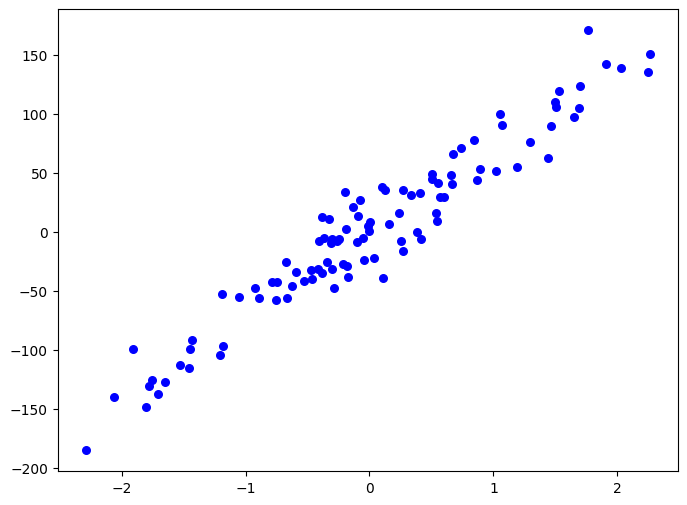

In [88]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y,color='b',marker='o',s=30)
plt.show()

In [108]:
regressor = linearRegression(lr=0.01,n_iters=1000)
regressor.fit(X_train,y_train)
predicted = regressor.predict(X_test)

In [109]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [110]:
mse(y_test, predicted)

387.4276539117133

In [112]:
def draw_line(X_train,y_train,X_test,y_test,y_predicted):
    cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize = (8,6))
    m1 = plt.scatter(X_train,y_train,color='b',s=10)
    m2 = plt.scatter(X_test,y_test,color='y',s=10)
    plt.plot(X_test,y_predicted,color='black',linewidth=2,label='predicted')
    plt.show()

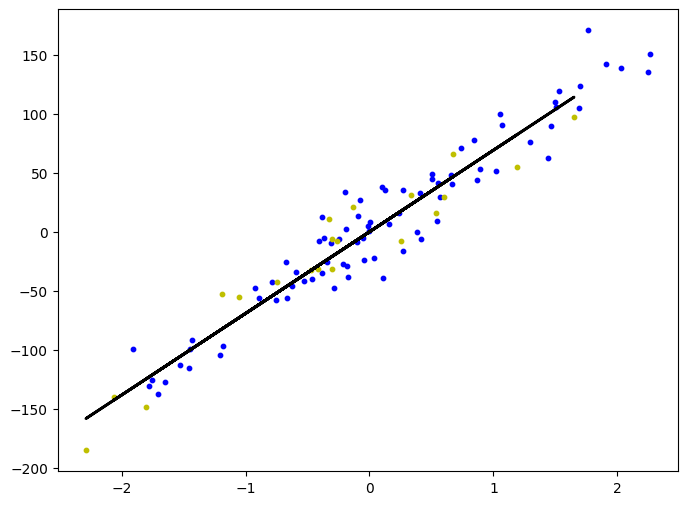

In [113]:
draw_line(X_train,y_train,X_test,y_test,predicted)